# PROBABILITY & STATISTICS FOR DATA MANAGEMENT AND ANALYSIS

## SESSIONS 11-15 PCA AND CLUSTER ANALYSIS

<img src="img/profile_manoelgadi.png" width=100 height=100 align="right">

Author: Prof. Manoel Gadi

Contact: mfalonso@faculty.ie.edu

Teaching Web: http://mfalonso.pythonanywhere.com

Last revision: 27/March/2022

In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

## PRINCIPAL COMPONENT ANALYSIS

### Outline
1. EFA: Introduction 
2. PCA: The Basics
3. PCA_ The Math
4. Hands-on: Crime Cast Study


### Learning objectives
<img src="img/capture1.png" width=100 height=100 align="right">


- Differentiate factor analysis techniques from other multivariate
techniques
- Distinguish between exploratory and confirmatory uses of factor
analytic techniques
- Distinguish between R and Q factor analysis
- Define PCA and understand its applications
- Understand the math behind PCA
- Carry out a PCA analysis using Python
- Assess how many principle components are needed
- Interpret principle components scores.
- Determine when a PCA should be based on variance-covariance
matrix or correlation matrix.
- Identify the differences between component analysis and
common factor analysis models.
- Understand the main limitations of factor analysis


## Introduction
- **Exploratory Factor Analysis (EFA):** interdependence technique whose
primary purpose is to define the **underlying structure among the
variables in the analysis**
- Exploratory factor analysis examines the interrelationships among a large
number of variables and then attempts to explain them in terms of their **common underlying dimensions: The Factors**
- Exploratory factor analysis does not have independent and dependent
variables; all variables are considered simultaneously

**Objectives of EFA:**
- **Data summarization** = derives underlying dimensions that, when
interpreted and understood, describe the data in a **much smaller number
of concepts** than the original individual variables
- **Data reduction** = extends the process of data summarization by
deriving an **empirical value (factor score or summated scale) for each
dimension (factor)** and then **substituting** this value for the original values

#### Illustration I
Correlation Matrix for Nine Store Image Elements


<img src="img/capture3.png" width=400 height=400 align="middle">


**Question:** are all of these elements separate in their evaluative properties or
do they group into some general areas of evaluation?
**Example:** do all the product elements group together? Where does price
level fit, or is it separate? How do the in-store features relate to one another?

**Correlation Matrix for Variables after Grouping Using Factor Analysis: shaded areas**

<img src="img/capture4.png" width=400 height=400 align="middle">



### 1) Factor Analysis Decision Process
**Overview**
<img src="img/capture5.png" width=250 height=250 align="middle">


**Different stages in detail:**
<img src="img/capture6.png" width=450 height=450 align="middle">


#### Exploratory vs Confirmatory
- Exploratory Factor Analysis (EFA) = is used to discover the factor structure of a construct and examine its reliability
    - It is data driven
- Confirmatory Factor Analysis (CFA) = is used to confirm the fit of the hypothesized factor structure to the observed (sample) data
    - It is theory
driven

### 2) Factor Analysis Design
- Factor analysis is performed most often only on metric variables,
although specialized methods exist for the use of dummy variables
- A small
number of “dummy variables” can be included.
- If a study is being designed to reveal factor structure, strive to have at
least five variables for each proposed factor.
- For sample size:
    - Must have more observations than variables.
    - The minimum absolute sample size should be 50 observations.
    - Maximize the number of observations per variable, with a minimum of     five variables per factor and at least ten observations per variable

#### CFA vs PCA
- **Common Factor Analysis:**
    - Factors are based on a reduced correlation matrix
    - Communalities (total amount of variance an original variables shares with all other variables included in the analysis) are inserted in the diagonal of the correlation matrix
    - Extracted factors are based on the common variance, with specific and error variance excluded
- **Principle Component Analysis:**
    - Factors are based on total variance
    - With component analysis, unities (1) are used in the diagonal of the correlation matrix; implying that all the variance is common or shared
    
- Criteria for selection:
    - Objectives of the factor analysis.
    - Amount of prior knowledge about the variance in the variables
    
**Extraction Method Determines the Types of Variance Carried into the Factor Matrix**
<img src="img/capture7.png" width=450 height=450 align="middle">


# HANDS-ON: PYTHON

1. Python: Crime Case-Study

Source:http://psych.colorado.edu/~carey/courses/psyc7291/classdatasets.htm

Metadata: 1977 crime rates by US state.
- 7 variables: murder, robbery, assault, burglary, larceny, and auto.
- Larceny vs robbery: 
    - Robbery involves use of force, serious legal penalties
    - Larceny: no force, permanent deprivation of property.
- 50 states

Objective:
- Study the covariance/correlation between the variables
- Run a PCA for dimension reduction




In [2]:
import pandas as pd
df = pd.read_csv("datasets/crime.csv")
df

,STATE,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
0,ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
5,COLORADO,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
6,CONNECTICUT,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
7,DELAWARE,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
8,FLORIDA,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4
9,GEORGIA,11.7,31.1,140.5,256.5,1351.1,2170.2,297.9


In [3]:
df.shape

(50, 8)

3) Variable View
<img src="img/capture26.png" width=400 height=400 align="middle"> 



In [4]:
df.dtypes

STATE        object
MURDER      float64
RAPE        float64
ROBBERY     float64
ASSAULT     float64
BURGLARY    float64
LARCENY     float64
AUTO        float64
dtype: object

## Test Considerations
- Data: The variables should be **quantitative** at the interval or ratio level.
    - Categorical data (such as religion or country of origin) are not suitable for factor analysis
    - Data for which Pearson correlation coefficients can sensibly be calculated should be suitable for factor analysis
- Considerations:
    - The data should have a **bivariate normal distribution** for each pair of variables 
    - Observations should be **independent**
    - The factor analysis model specifies that variables are determined by common factors (the factors estimated by the model) and unique factors (which do not overlap between observed variables); the computed estimates are based on the assumption that all unique factors are uncorrelated with each other and with the common factors
    
## Assumptions & Considerations
- You have multiple variables that should be measured at the continuous level (although ordinal variables are very frequently used)
- There needs to be a **linear relationship** between all variables
- You should have **sampling adequacy**, which simply means that for PCA to produce a reliable result, large enough sample sizes are required
    - There are many different rules-of-thumb have been proposed which mainly differ depending on whether an absolute sample size is proposed or if a multiple of the number of variables in your sample are used
    - Generally speaking, a **mimimum of 150 cases**, or 5 to 10 cases per variable, has been recommended as a minimum sample size
- Your data should be suitable for **data reduction**: **Multicollinearity** → Assessed using **MSA** (measure of sampling adequacy) and Bartlett´s test of
- **Sphericity**: statistical test for the overall significance of all correlations within a correlation matrix
    - There should be no significant outliers
    - Homogeneity of sample factor solution
    
    
### Rules of Thumb
- There must be a **strong conceptual foundation** to support the assumption that a structure does exist before the factor analysis is performed
- A statistically significant **Bartlett’s test of sphericity** (sig. < .05) indicates that sufficient correlations exist among the variables to proceed
- Measure of **Sampling Adequacy (MSA)** values must exceed .50 for both the overall test and each individual variable. Variables with values less than .50 should be omitted from the factor analysis one at a time, with the smallest one being omitted each time

- The results of PCA depend on the measurement scales
- Variables with the **highest simple variance tend to be emphasized in the first few principle components**
- PCA using the covariance function should only be considered if all variables have the same units of measurement
- Conclusion: **choose a correlation matrix; Covariance matrix is not appropriate, and extract more**

## Correlation Matrix

- Correlation test of significance is one tail t test (Ho: r = 0; H1: r > 0 or r < 0)
- Murder is highly significantly correlated with rape, robbery, and assault.

In [5]:
df.corr()

,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
MURDER,1.000000,0.601220,0.483708,0.648550,0.385817,0.101920,0.068814
RAPE,0.601220,1.000000,0.591879,0.740260,0.712130,0.613988,0.348902
ROBBERY,0.483708,0.591879,1.000000,0.557078,0.637242,0.446740,0.590680
ASSAULT,0.648550,0.740260,0.557078,1.000000,0.622909,0.404363,0.275843
BURGLARY,0.385817,0.712130,0.637242,0.622909,1.000000,0.792121,0.557953
LARCENY,0.101920,0.613988,0.446740,0.404363,0.792121,1.000000,0.444180
AUTO,0.068814,0.348902,0.590680,0.275843,0.557953,0.444180,1.000000


In [6]:
X = df.iloc[:,1:] # Solo las variables numericas

In [7]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            tmp = df[df[r].notnull() & df[c].notnull()]
            pvalues[r][c] = round(pearsonr(tmp[r], tmp[c])[1], 4)
    return pvalues

calculate_pvalues(X)
# ref: https://stackoverflow.com/questions/25571882/pandas-columns-correlation-with-statistical-significance

,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
MURDER,0.0,0.0,0.0004,0.0,0.0057,0.4813,0.6349
RAPE,0.0,0.0,0.0,0.0,0.0,0.0,0.013
ROBBERY,0.0004,0.0,0.0,0.0,0.0,0.0011,0.0
ASSAULT,0.0,0.0,0.0,0.0,0.0,0.0036,0.0525
BURGLARY,0.0057,0.0,0.0,0.0,0.0,0.0,0.0
LARCENY,0.4813,0.0,0.0011,0.0036,0.0,0.0,0.0012
AUTO,0.6349,0.013,0.0,0.0525,0.0,0.0012,0.0


## KMO and Bartlett’s Test


- **Kaiser-Meyer-Olkin (KMO) Test for Sampling Adequacy** is a measure of how suited your data is for Factor Analysis
- The test measures sampling adequacy for each variable in the model and for the complete model
    - The statistic is a measure of the proportion of variance among variables that might be common variance
    - **The higher the proportion, the more suited your data is to Factor Analysis**
- **KMO returns values between 0 and 1.** A rule of thumb for interpreting the statistic:
    - **0.8 ≤ KMO ≤ 1** indicate the sampling is **adequate**
    - **KMO ≤ 0.5** indicate the sampling is **not adequate**
    - **KMO = 0** means that there are **large partial correlations compared to the sum of correlations** (there
are widespread correlations which are a large problem for factor analysis)

**Bartlett’s test for Sphericity** compares your correlation matrix (a matrix of Pearson correlations) to the identity
matrix. It checks if there is a **redundancy between variables that can be summarized with some factor**


<img src="img/capture38.png" width=300 height=300 align="middle"> 

In [8]:
!pip install factor_analyzer
# ref: https://www.datacamp.com/tutorial/introduction-factor-analysis

Defaulting to user installation because normal site-packages is not writeable


In [9]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(X)
kmo_model

0.7837746141859161

Bartlett’s test of sphericity checks whether or not the observed variables intercorrelate at all using the observed correlation matrix against the identity matrix. If the test found statistically insignificant, you should not employ a factor analysis.

In [10]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(X)
chi_square_value, p_value

(219.50555648652264, 5.052453809584435e-35)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
#define scaler
scaler = StandardScaler()

#create copy of DataFrame
scaled_df=X.copy()

#created scaled version of DataFrame
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [13]:
df

,STATE,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
0,ALABAMA,14.2,25.2,96.8,278.3,1135.5,1881.9,280.7
1,ALASKA,10.8,51.6,96.8,284.0,1331.7,3369.8,753.3
2,ARIZONA,9.5,34.2,138.2,312.3,2346.1,4467.4,439.5
3,ARKANSAS,8.8,27.6,83.2,203.4,972.6,1862.1,183.4
4,CALIFORNIA,11.5,49.4,287.0,358.0,2139.4,3499.8,663.5
5,COLORADO,6.3,42.0,170.7,292.9,1935.2,3903.2,477.1
6,CONNECTICUT,4.2,16.8,129.5,131.8,1346.0,2620.7,593.2
7,DELAWARE,6.0,24.9,157.0,194.2,1682.6,3678.4,467.0
8,FLORIDA,10.2,39.6,187.9,449.1,1859.9,3840.5,351.4
9,GEORGIA,11.7,31.1,140.5,256.5,1351.1,2170.2,297.9


In [14]:
scaled_df

,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
0,1.764934,-0.050134,-0.312049,0.675094,-0.365337,-1.098488,-0.505749
1,0.876720,2.428393,-0.312049,0.732527,0.092958,0.972028,1.962772
2,0.537108,0.794818,0.161307,1.017679,2.462446,2.499415,0.323707
3,0.354241,0.175187,-0.467548,-0.079601,-0.745847,-1.126041,-1.013974
4,1.059587,2.221849,1.862644,1.478153,1.979625,1.152932,1.493721
5,-0.298858,1.527110,0.532903,0.822204,1.502644,1.714291,0.520103
6,-0.847461,-0.838756,0.061834,-0.801044,0.126360,-0.070397,1.126525
7,-0.377230,-0.078299,0.376261,-0.172300,0.912608,1.401467,0.467347
8,0.719976,1.301790,0.729563,2.396079,1.326755,1.627040,-0.136463
9,1.111835,0.503779,0.187604,0.455436,0.138273,-0.697299,-0.415909


In [15]:
from sklearn.decomposition import PCA

#define PCA model to use
pca = PCA(n_components=4)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

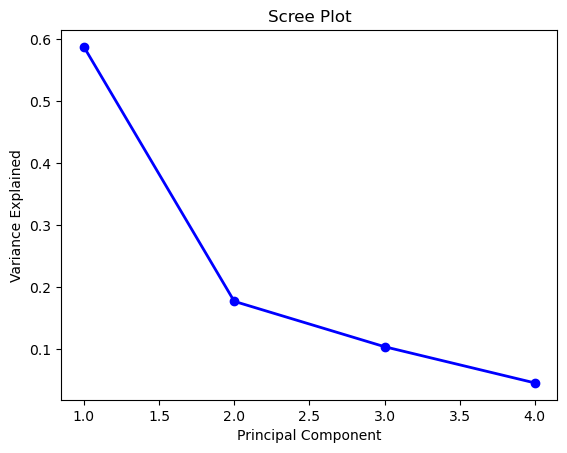

In [16]:
import matplotlib.pyplot as plt
import numpy as np

PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [17]:
sum(pca.explained_variance_ratio_[0:3])

0.8684997096636737

## Total Variance Explained

- The Total column gives the eigenvalue, or amount of variance in the original variables accounted for by each component
    - The % of Variance column gives the ratio, expressed as a percentage, of the variance accounted for by each component to the total variance in all variables.
- The Cumulative % column gives the percentage of variance accounted for by the first n components
    - For example, the cumulative percentage for the second component is the sum of the percentage of variance for the first and second components
    

**Extraction Sums of Squared Loadings**
- The second section of the table shows the extracted components
- They explain nearly 87% of the variability in the original 7 variables, so you can considerably reduce the complexity of the data set by using these components, with only a 13% loss of information

**Rotation Sums of Squared Loadings**
- The rotation maintains the cumulative percentage of variation explained by the extracted components, but that variation is now spread more evenly over the components
- The large changes in the individual totals suggest that the rotated component matrix will be easier to interpret than the unrotated matrix

**Rotated Component Matrix**
- The rotated component matrix helps you to determine what the components represent
- The first component is most highly correlated with murder
- The second component is most highly correlated with larceny
- The third component is most highly correlated with auto
- This suggests that you can focus on murder, larceny, and auto in further analyses, but you can do even better by saving component scores




In [18]:
print(pca.explained_variance_ratio_)

[0.58785136 0.17696026 0.10368809 0.04520458]


#### Component Score Coefficient Matrix 
- For each case and each component, the **component score is computed by multiplying the case's standardized variable values by the component's score coefficients**
- The resulting three component score variables are representative of, and can be used in place of, the seven original variables with only a 13% loss of information
- Using the saved components is also preferable to using murder, larceny, and auto because the components are representative of all 7 original variables, and the components are not linearly correlated with each other
- Although the linear correlation between the components is guaranteed to be 0, you should **look at plots of the component scores to check for outliers and nonlinear associations between the components**

In [19]:
scaled_df.head(1)

,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
0,1.764934,-0.050134,-0.312049,0.675094,-0.365337,-1.098488,-0.505749


In [20]:
print(pca.components_[0])

[0.30027916 0.43175936 0.39687549 0.3966517  0.44015721 0.35735953
 0.29517681]


In [21]:
scaled_df.head(1)*pca.components_[0]

,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
0,0.529973,-0.021646,-0.123845,0.267777,-0.160806,-0.392555,-0.149285


In [22]:
(scaled_df.head(1)*pca.components_[0]).T.sum()


0   -0.050387
dtype: float64

# Problem with the Rotation in Python and Varimax (Only availabe for  FA not for PCA yet)
https://github.com/scikit-learn/scikit-learn/issues/2688

In [23]:
pca.components_

array([[ 0.30027916,  0.43175936,  0.39687549,  0.3966517 ,  0.44015721,
         0.35735953,  0.29517681],
       [-0.62917444, -0.16943512,  0.04224698, -0.34352815,  0.20334059,
         0.40231912,  0.50242093],
       [ 0.1782453 , -0.24419758,  0.49586087, -0.06950972, -0.20989509,
        -0.53923144,  0.56838373],
       [-0.23211411,  0.06221567, -0.55798926,  0.62980445, -0.05755491,
        -0.23488987,  0.41923832]])

In [24]:
df_pcs = pd.DataFrame(pca.components_,columns=X.columns,index=['Betas Principal Component 1',
                                                      'Betas Principal Component 2',
                                                      'Betas Principal Component 3','Betas Principal Component 4']).T
df_pcs

,Betas Principal Component 1,Betas Principal Component 2,Betas Principal Component 3,Betas Principal Component 4
MURDER,0.300279,-0.629174,0.178245,-0.232114
RAPE,0.431759,-0.169435,-0.244198,0.062216
ROBBERY,0.396875,0.042247,0.495861,-0.557989
ASSAULT,0.396652,-0.343528,-0.069510,0.629804
BURGLARY,0.440157,0.203341,-0.209895,-0.057555
LARCENY,0.357360,0.402319,-0.539231,-0.234890
AUTO,0.295177,0.502421,0.568384,0.419238


In [25]:
scaled_df.head(1)

,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
0,1.764934,-0.050134,-0.312049,0.675094,-0.365337,-1.098488,-0.505749


In [26]:
df_pcs['Betas Principal Component 1']

MURDER      0.300279
RAPE        0.431759
ROBBERY     0.396875
ASSAULT     0.396652
BURGLARY    0.440157
LARCENY     0.357360
AUTO        0.295177
Name: Betas Principal Component 1, dtype: float64

In [27]:
scaled_df.head(1)*df_pcs['Betas Principal Component 1']

,MURDER,RAPE,ROBBERY,ASSAULT,BURGLARY,LARCENY,AUTO
0,0.529973,-0.021646,-0.123845,0.267777,-0.160806,-0.392555,-0.149285


In [28]:
a = scaled_df.head(1)*df_pcs['Betas Principal Component 1']
a.T


,0
MURDER,0.529973
RAPE,-0.021646
ROBBERY,-0.123845
ASSAULT,0.267777
BURGLARY,-0.160806
LARCENY,-0.392555
AUTO,-0.149285


In [29]:
a.T.sum()

0   -0.050387
dtype: float64

---
## Applying the Betas of all PCs to each of the data points


In [30]:
from sklearn.decomposition import PCA

pca = PCA(n_components=4)

principalComponents = pca.fit_transform(scaled_df)

principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2','principal component 3', 'principal component 4'])
principalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.050387,-2.117383,0.506738,0.253533
1,2.446100,0.168214,-0.070439,1.172253
2,3.044739,0.853523,-1.769737,-0.117392
3,-1.065115,-1.359100,-0.018524,0.021755
4,4.327295,0.144641,0.278959,0.025377


In [31]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4
0,-0.050387,-2.117383,0.506738,0.253533
1,2.446100,0.168214,-0.070439,1.172253
2,3.044739,0.853523,-1.769737,-0.117392
3,-1.065115,-1.359100,-0.018524,0.021755
4,4.327295,0.144641,0.278959,0.025377
5,2.534768,0.925902,-1.163272,0.113746
6,-0.546825,1.516471,0.791844,0.087065
7,0.974374,1.309908,-0.531204,-0.421561
8,3.143346,-0.610048,-1.227745,0.500101
9,0.495386,-1.394807,0.247113,-0.063110


## Varimax Rotation in Python using Factor Analysis (FA)
https://scikit-learn.org/stable/auto_examples/decomposition/plot_varimax_fa.html
    
---

### Interpreting the PC
- An optimal structure exists when all variables have high loadings only on a single factor
- Variables that **cross-load** (load highly on two or more factors) are usually deleted** unless theoretically justified or the objective is strictly data reduction
- **Variables should generally have communalities of greater than .50 to be retained in the analysis**
- Respecification of a factor analysis can include options such as:
     - deleting a variable(s)
     - changing rotation methods
     - increasing or decreasing the number of factors

### Scatterplot Matrix of Component Scores

- To produce a scatterplot matrix of the component scores, from the menus choose: Graphs > Chart Builde
- Click the Gallery tab, select Scatter/Dot for the chart type, and drag and drop the Scatterplot Matrix icon to the canvas
- Select REGR factor score 1 for analysis 1 through REGR factor score 3 for analysis 1 as the matrix variables
- Click OK


#### Scatterplot Matrix
- The first plot in the first row shows the first component on the vertical axis vs the second component on the horizontal axis, and the order of the remaining plots follows from there
- There appear to be no correlation between the principle components



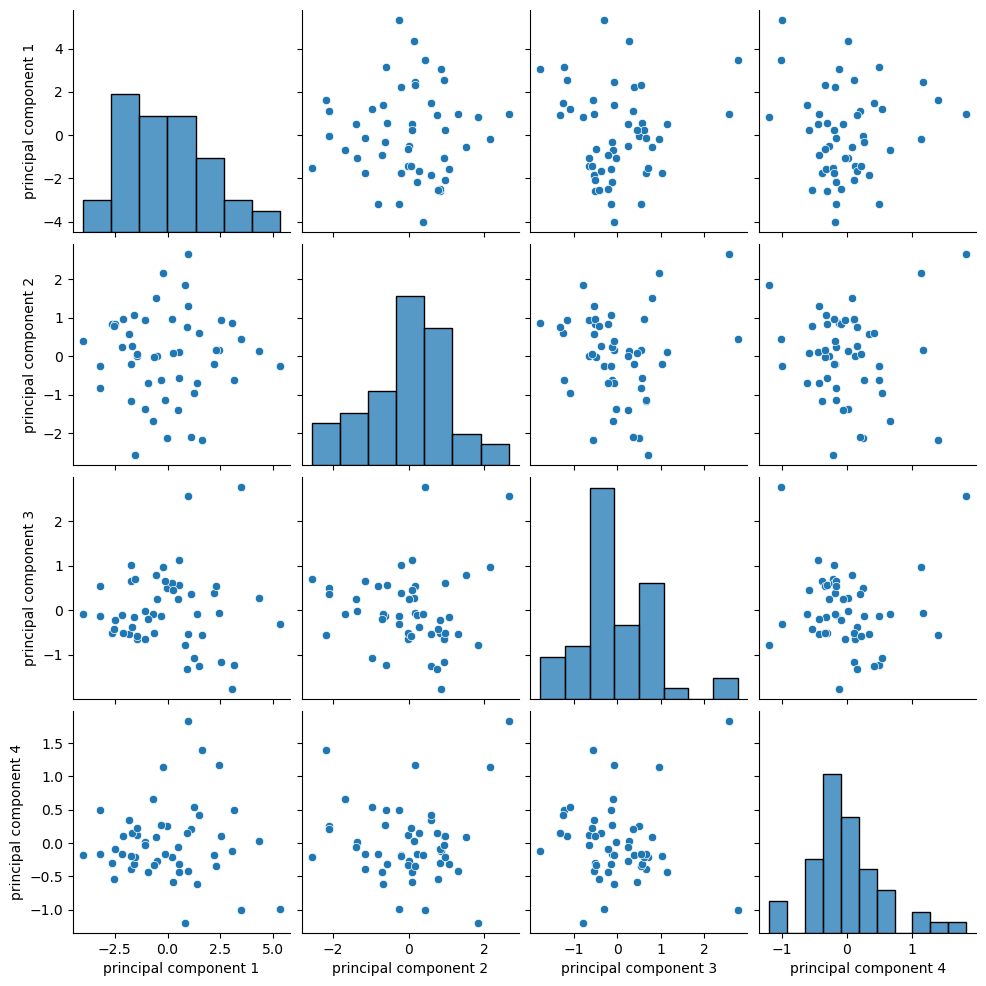

In [32]:
import seaborn as sns
sns.pairplot(principalDf)

### 6. Validation

- Confirmatory Perspective: Structural Equation Modelling
- Assessing Factor Structure Stability.
- Detecting Influential Observations.

In [33]:
df_state_by_region = pd.read_excel("datasets/USA_STATES_BY_REGION.xlsx")

In [34]:
df_state_by_region.head(5)

,state,region
0,ALABAMA,South
1,ALASKA,West
2,ARIZONA,West
3,ARKANSAS,South
4,CALIFORNIA,West


In [35]:
df_state_by_region['region'].value_counts()

South         16
Midwest       12
West          11
North East     9
Name: region, dtype: int64

In [36]:
principalDf['region'] = df_state_by_region['region']

In [37]:
principalDf

,principal component 1,principal component 2,principal component 3,principal component 4,region
0,-0.050387,-2.117383,0.506738,0.253533,South
1,2.446100,0.168214,-0.070439,1.172253,West
2,3.044739,0.853523,-1.769737,-0.117392,West
3,-1.065115,-1.359100,-0.018524,0.021755,South
4,4.327295,0.144641,0.278959,0.025377,West
5,2.534768,0.925902,-1.163272,0.113746,West
6,-0.546825,1.516471,0.791844,0.087065,North East
7,0.974374,1.309908,-0.531204,-0.421561,South
8,3.143346,-0.610048,-1.227745,0.500101,South
9,0.495386,-1.394807,0.247113,-0.063110,South


In [38]:
finalDf = principalDf.copy()
finalDf.head()

,principal component 1,principal component 2,principal component 3,principal component 4,region
0,-0.050387,-2.117383,0.506738,0.253533,South
1,2.446100,0.168214,-0.070439,1.172253,West
2,3.044739,0.853523,-1.769737,-0.117392,West
3,-1.065115,-1.359100,-0.018524,0.021755,South
4,4.327295,0.144641,0.278959,0.025377,West


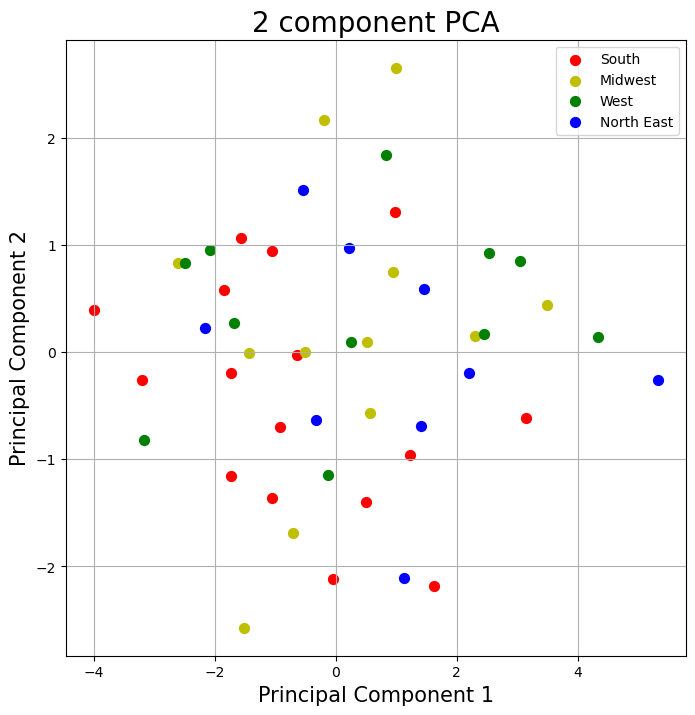

In [39]:
%matplotlib inline
from matplotlib import pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)

targets = ['South', 'Midwest', 'West', 'North East']
colors = ['r', 'y', 'g','b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['region'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

## PCA: THE BASICS

**Principal Component Analysis (PCA):** mathematical technique that uses eigenvalues and eigenvectors to find principal components of a dataset (i.e. components that explain most of the variance in a data set).
- In a data set, the Principle Components are the underlying structure, the directions where the data is most spread out (i.e. straight line where the data is most spread out when projected onto it).
- PCA is an exploratory data analysis technique used in data reduction
(i.e. to reduce the dimensions of a data set into its basic components).
- A test typically conducted prior to regression analysis.
- PCA is a change of variable space


#### Illustration
<img src="img/capture8.png" width=450 height=450 align="middle">

#### Eigenvalues & Eigenvectors
- An eigenvector is a direction, whereas an eigenvalue is a number, telling you how much variance (spread) there is in the data in that direction
- Usually, the eigenvector with the highest eigenvalue is the principal
component of a dataset
- The amount of eigenvectors/values that exist equals the number of
dimensions the data set has
- **WHY?**
    - Eigenvectors put the data into a new set of dimensions
    - The new dimensions must be equal to the original amount of dimensions

**Illustration of Eigenvalues & Eigenvectors**

<img src="img/capture9.png" width=450 height=450 align="middle">

The number of eigenpairs corresponds to the number of variables in a dataset.
However, usually 2 or more eigenvectors explain most of the variation in the data

## PCA: THE MATH

Suppose you have a random variable X, representing the number of variables in a dataset:
<img src="img/capture10.png" width=100 height=100 align="middle">

with population variance-covariance matrix, Σ

<img src="img/capture11.png" width=150 height=150 align="middle">

Consider the linear combinations:
<img src="img/capture12.png" width=150 height=150 align="right">

- Each of these equations can be
thought of as a linear regression:
predicting Yi from X1, X2, …, Xp
- No intercept and ei1, ei2, …, eip
are regressions coefficients

Each linear combinations of the data will correspond to a principle component

### Linear Combinations of Random Variables
Yi is a random variable and has the following population variance:
<img src="img/capture13.png" width=250 height=250 align="middle">

In each term within the double sum, the product of the paired coefficients eik times
eil is multiplied by the covariance between the kth and lth variables. If Σ is the
variance-covariance matrix of X, then Var(Y) = ei ′ Σ ei

Moreover, Yi and Yj have population covariance
<img src="img/capture14.png" width=250 height=250 align="middle">


Collect the coefficients eij into the vector
<img src="img/capture15.png" width=100 height=100 align="middle
                                                     ">

### The Math
**First Principal Component (PCA1): Y1**
- The first principal component is the linear combination of x-variables that has
maximum variance (among all linear combinations)
- It accounts for as much variation in the data as possible. 

<img src="img/capture16.png" width=250 height=250 align="middle">

- Specifically we define coefficients e11, e12, ... , e1p for the first component in such a way that its **variance is maximized, subject to the constraint that the sum of the squared coefficients is equal to one**
- This constraint is required so that a unique answer may be obtained.
- More formally, select e11, e12, ... , e1p that maximizes:

<img src="img/capture17.png" width=200 height=200 align="middle">

**Second Principal Component (PCA2): Y2**
- The second principal component is the linear combination of x-variables that accounts for as much of the remaining variation as possible, with the constraint that the correlation between the first and second component is 0

<img src="img/capture18.png" width=250 height=250 align="middle">

- Select e21, e22, ... , e2p that maximizes the variance of this new component subject to the constraint that the sums of squared coefficients add up to one:

<img src="img/capture19.png" width=200 height=200 align="middle">

- Along with the additional constraint that these two componetns are uncorrelated 

<img src="img/capture20.png" width=250 height=250 align="middle">


**All subsequent principal components have this same property – they are linear combinations that account for as much of the remaining variation as possible and they are not correlated with the other principal components**

#### Finding the coefficients eij for a principal component?
- The solution involves the eigenvalues and eigenvectors of the variancecovariance matrix.
- Let λ1 through λp denote the eigenvalues of the variance-covariance matrix.
These are ordered so that λ1 has the largest eigenvalue and λp is the smallest.
- Let the vectors e1 through ep denote the corresponding eigenvectors: It turns
out that the elements for these eigenvectors are the coefficients of our
principal components
- The variance for the ith principal component is equal to the ith eigenvalue: 

<img src="img/capture22.png" width=350 height=350 align="middle">

- Moreover, the principal components are uncorrelated with one another:

<img src="img/capture21.png" width=200 height=200 align="middle">


##### Notes
- All of this is defined in terms of the population variance-covariance matrix Σ
which is unknown.
- However, we can estimate Σ by the sample variance-covariance matrix S.
- All corresponding eigenvalues/eigenvectors are estimated.
- In a PCA, we only retain the first k components. Here, we must balance two
conflicting facts:
    1. To obtain the simplest possible interpretation, we want k to be as small as possible
    2. To avoid loss of information, we want the proportion of variation explained by the
first k principle components to be large. Ideally, as close to 1 as possible

<img src="img/capture23.png" width=200 height=200 align="middle">


### Dimension Reduction
When multicollinearity exists between the x-variables, the data may more or less fall on a line or plane in a lower number of dimensions.

**Examples:**
1) Imagine a plot of two x-variables that have a nearly perfect correlation
    - The data points will fall close to a straight line.
    - That line could be used as a new (one-dimensional) axis to represent the variation among data points.

2) Suppose that we have verbal, math, and total SAT
scores for a sample of students → at most two dimensions


**Ultimate goal of PCA is to reduce the dimensions of d-dimensional dataset**
by projecting it into a k-dimensional subspace (where k < d) in order to
**increase the computational efficiency** while retaining most of the
information

## RECAP OF PCA:

PCA is the **data reduction technique (columns)**
* This method seeks to find linear combinations of predictors, known as main components (PC), that capture the greatest possible variance
* The __1o main component of the PC captures the greatest variability among all linear combinations__
* Then, __the subsequent PCs__ are derived in such a way that these linear combinations capture the most remaining variability and, at the same time, do not correlate with all previous PCs
* In PCA, the eigenvalues represent the variance of each PC
* Each principle component is a linear combination of all variables, each weighted by a factor that represent the coordinates of the corresponding eigenvector
* Choosing the number of eigenvalues and hence principle
component involves balancing between small number that still account for most of the variation in a data set

Advantages:
* Create components that are not correlated
* The PCA does not consider the response variable when summarizing the variability. Not supervised

Warnings:
* Sensitive to scales and distributions (biased)
* PCA focuses on identifying the data structure based on measurement scales rather than the important relationships within the data


<img src="img/PCA.jpeg">
